In [1]:
import pandas as pd 
df1 = pd.read_csv("C:/nodejs scripts/Stock.csv")

In [2]:
df1.head()

,Date,Open,Volume,50-Day Moving Average,200-Day Moving Average
0,01-01-2020,6.698408,295689.37230,55.356753,54.001058
1,02-01-2020,61.452089,847607.11960,56.107148,54.034503
2,03-01-2020,21.911287,804114.07660,55.246507,54.222753
3,04-01-2020,47.445713,844474.63390,56.443637,54.207440
4,05-01-2020,88.814258,36360.73427,57.048413,53.992278


In [3]:
df = df1.reset_index()['Open']

In [4]:
df.head()

0     6.698408
1    61.452089
2    21.911287
3    47.445713
4    88.814258
Name: Open, dtype: float64

In [5]:
df.shape

(2500,)

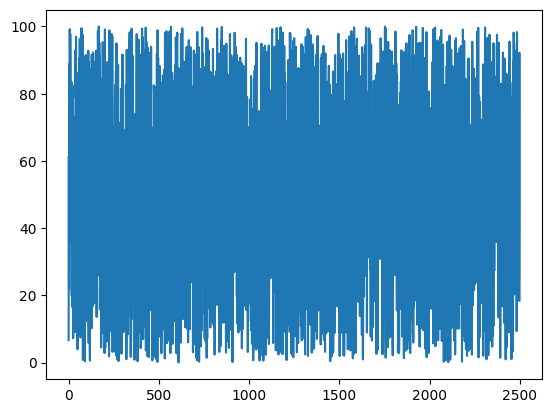

In [6]:
import matplotlib.pyplot as plt 
plt.plot(df)

In [7]:
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,0.1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))

In [8]:
df.shape

(2500, 1)

In [9]:
print(df)

[[-0.92687764]
 [-0.3242044 ]
 [-0.75942963]
 ...
 [-0.52949554]
 [ 0.01389164]
 [-0.79774651]]


In [10]:
training_size = int(len(df)*0.65)
test_size = len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [11]:
training_size,test_size

(1625, 875)

In [12]:
train_data

array([[-0.92687764],
       [-0.3242044 ],
       [-0.75942963],
       ...,
       [-0.70067261],
       [-0.09893295],
       [-0.81440732]])

In [13]:
import numpy as np
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [14]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [15]:
X_train

array([[-0.92687764, -0.3242044 , -0.75942963, ..., -0.81880572,
        -0.39857245, -0.20085444],
       [-0.3242044 , -0.75942963, -0.47837245, ..., -0.39857245,
        -0.20085444, -0.48036397],
       [-0.75942963, -0.47837245, -0.02302926, ..., -0.20085444,
        -0.48036397, -0.11049809],
       ...,
       [ 0.0120662 , -0.3334528 , -0.41736718, ..., -0.59231099,
        -0.3826592 , -0.10279883],
       [-0.3334528 , -0.41736718, -0.97668904, ..., -0.3826592 ,
        -0.10279883, -0.59284172],
       [-0.41736718, -0.97668904, -0.21106802, ..., -0.10279883,
        -0.59284172, -0.70067261]])

In [16]:
print(X_train.shape), print(y_train.shape)

(1524, 100)
(1524,)


(None, None)

In [17]:
print(X_test.shape), print(y_test.shape)

(774, 100)
(774,)


(None, None)

In [18]:
# Reshape X_train
if len(X_train.shape) == 2:
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Reshape X_test
if len(X_test.shape) == 2:
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [19]:
X_test = X_test.reshape(-1, 1, 1)


In [20]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import LSTM 


In [21]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_aquared_error",optimizer='adam')

c:\Users\pasam\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
print("X_train shape:", X_train.shape)  # Should be (num_samples, time_steps, features)
print("y_train shape:", y_train.shape)  # Should be (num_samples,) or (num_samples, 1)
min_samples = min(X_train.shape[0], y_train.shape[0])
X_train = X_train[:min_samples]
y_train = y_train[:min_samples]
if len(y_train.shape) == 1:
    y_train = y_train.reshape(-1, 1)


X_train shape: (1524, 100, 1)
y_train shape: (1524,)


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [25]:
model.compile(loss="mean_squared_error", optimizer='adam')  # Correct loss function
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 489ms/step - loss: 0.1735 - val_loss: 0.0969
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 352ms/step - loss: 0.1066 - val_loss: 0.0968
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 407ms/step - loss: 0.1102 - val_loss: 0.1021
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 229ms/step - loss: 0.1125 - val_loss: 0.1034
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 220ms/step - loss: 0.1069 - val_loss: 0.0979
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 200ms/step - loss: 0.1100 - val_loss: 0.0994
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 187ms/step - loss: 0.1044 - val_loss: 0.1002
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 196ms/step - loss: 0.1090 - val_loss: 0.1016
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 190ms/step - loss: 0.1047 - val_loss: 0.0969
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 200ms/step - loss: 0.1012 - val_loss: 0.0968
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 201ms/step - loss: 0.1106 - val_loss: 0.0993
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━

In [26]:
import tensorflow as tf 

In [27]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [28]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (1219, 100, 1)
X_test shape: (305, 100, 1)


In [29]:
import numpy as np

if np.isnan(X_train).any() or np.isinf(X_train).any():
    print("X_train contains NaN or infinite values.")
else:
    print("X_train is clean.")

if np.isnan(X_test).any() or np.isinf(X_test).any():
    print("X_test contains NaN or infinite values.")
else:
    print("X_test is clean.")


X_train is clean.
X_test is clean.


In [30]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


In [31]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [33]:
import math
from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(y_train, train_predict))
print(rmse)


48.955439649781276


In [34]:
math.sqrt(mean_squared_error(y_test, test_predict))

48.89362772401021

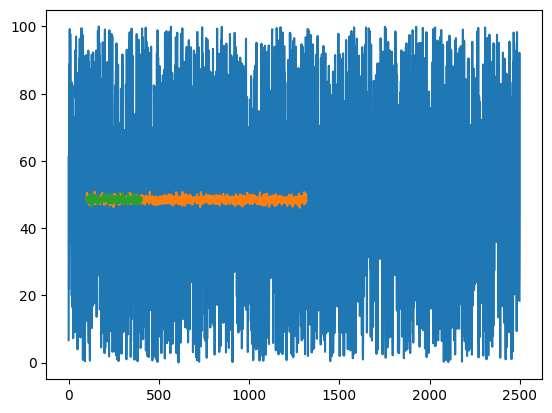

In [35]:
look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df)
testPredictPlot[:,:] = np.nan
testPredictPlot[look_back:len(test_predict)+look_back, :] = test_predict

plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [36]:
len(test_data)

875

In [37]:
from numpy import array

temp_input = [0.5] * 100  

lst_output = []
n_steps = 100
i = 0

while i < 30:
    
    if len(temp_input) >= n_steps: 
        x_input = array(temp_input[-n_steps:])  
        print("{} day input {}".format(i + 1, x_input))
        x_input = x_input.reshape(1, n_steps, 1) 

        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i + 1, yhat))

        
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]  
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        print("Not enough input data for prediction.")
        break

print("Predicted outputs:", lst_output)


1 day input [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
1 day output [[-0.38856363]]
2 day input [ 0.5         0.5         0.5         0.5         0.5         0.5
  0.5         0.5         0.5         0.5         0.5         0.5
  0.5         0.5         0.5         0.5         0.5         0.5
  0.5         0.5         0.5         0.5         0.5         0.5
  0.5         0.5         0.5         0.5         0.5         0.5
  0.5         0.5         0.5         0.5         0.5         0.5
  0.5         0.5         0.5         0.5         0.5         0.5
  0.5         0.5         0.5         0.5         0.5         0.5
  0.5       